In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## информация о типах данных/структуре в таблице

In [7]:
all_data = pd.read_csv('titanic.csv')

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


## заголовки и характер данных в целом (первые 5 строк таблицы)

In [6]:
all_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## наличие незаполненных полей в таблице

In [8]:
all_data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

## Основные стат. данные по пассажирам

In [9]:
peoples_all = all_data['name'].count()
peoples_male = all_data['sex'].value_counts()['male']
peoples_female = all_data['sex'].value_counts()['female']

print(f'\nплыло на Титанике: {peoples_all} человек, из них мужчин: {peoples_male}, женщин: {peoples_female}') 

mean_age = round(all_data['age'].mean(), 1)
max_age = all_data['age'].max()
print(f'\nСредний возраст участников плавания: {mean_age}')
print(f'Самому старшему участнику плавания: {max_age}')
print(f'Самому младшему участнику плавания: {all_data["age"].min()}')


плыло на Титанике: 1309 человек, из них мужчин: 843, женщин: 466

Средний возраст участников плавания: 29.9
Самому старшему участнику плавания: 80.0
Самому младшему участнику плавания: 0.17


## Основные стат. данные по спасшимся и погибшим пассажирам

In [10]:
survived_all = all_data['survived'].sum()
survived_male = all_data.loc[all_data['sex'] == 'male', 'survived'].sum()
survived_female = all_data.loc[all_data['sex'] == 'female', 'survived'].sum()
print(f'\nвсего спаслось с Титаника: {survived_all} человек, из них мужчин: {survived_male}, женщин: {survived_female}')

print(f'\nПроцент спасшихся мужчин: {round(((survived_male/peoples_male)*100),2)}')
print(f'\nПроцент спасшихся женщин: {round(((survived_female/peoples_female)*100),2)}')


всего спаслось с Титаника: 500 человек, из них мужчин: 161, женщин: 339

Процент спасшихся мужчин: 19.1

Процент спасшихся женщин: 72.75


## Pаспределение мужчин и женщин по классам кают

In [11]:
pd.crosstab(all_data['pclass'], all_data['sex'])

sex,female,male
pclass,,
1,144,179
2,106,171
3,216,493


## Соотношение спасшихся по классам кают

Text(0.5, 1.0, 'Соотношение спасшихся по классам кают')

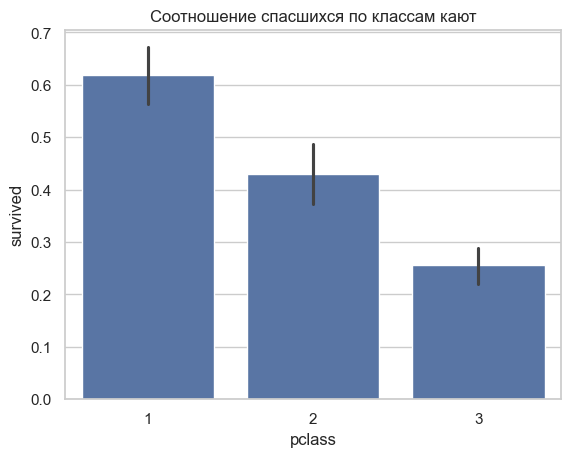

In [33]:
sns.barplot(x='pclass', y='survived', data=all_data)
plt.title('Соотношение спасшихся по классам кают')

## Соотношение спасшихся по половому признаку

Text(0.5, 1.0, 'Соотношение спасшихся по половому признаку')

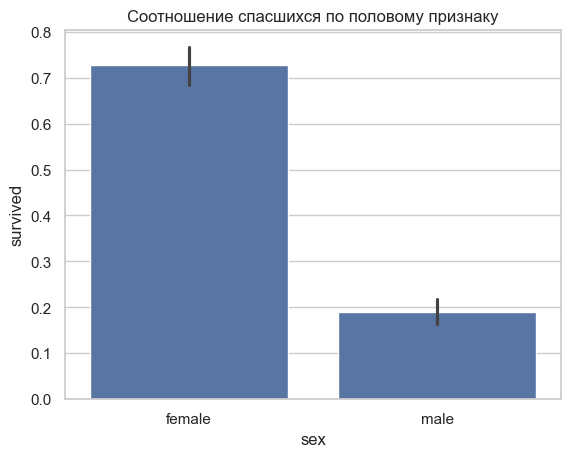

In [31]:
sns.barplot(x='sex', y='survived', data=all_data)
plt.title('Соотношение спасшихся по половому признаку')

## Соотношение количества пассажиров по портам отправления

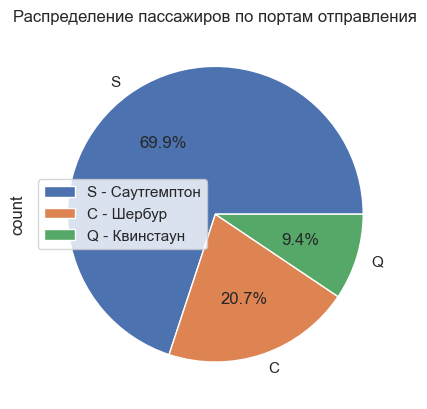

In [29]:
labels = ['S - Саутгемптон', 'C - Шербур', 'Q - Квинстаун']
all_data['embarked'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Распределение пассажиров по портам отправления')
plt.legend(labels=labels, loc='best')
plt.show()

## Отчет

В качестве тестового образца файла CSV из сети Интернет  
был взят файл titanic.csv  
Используя библиотеку Pandas файл titanic.csv был загружен  
в Python и преобразован в DataFrame all_data  

Используя команды all_data.info() и all_data.head()  
была получена общая информация о датафрейме (количество целочисленных данных  
данных с десятичной запятой, строковых данных) и общий вид таблицы  
с заголовками и первыми строками.  

Выполнен простой анализ данных, такой как подсчет средних значений, медианы,  
минимальных и максимальных значений для числовых столбцов.  

Произведены некоторые действия с полученными значениями, по которым  
можно сделать некоторые выводы о последствиях катастрофы.  
Выводы от простейших числовых (соотношений выживших и погибших (по половому  
признаку, по классу занимаемых кают)), так и социальных (цель поездки пассажиров  
1-го класса и 3-го класса, почему такая огромная разница между спасшимися  
женщинами и мужчинами).

Используя библиотеки Matplotlib и Seaborn были построены несколько  
графиков снабженных заголовками и легендой.  

В работе были активно использованы обучающие материалы из Интернета  
и ChatGPT версии 3.5

Работу выполнил ***Зиборов Тимофей Юрьевич***  
в рамках домашнего задания программы  
**"Анализ данных с использованием нейросетей в DATA Science"**

